## Algorithms for Massive Data

---

# Face/comic recognizer with deep learning

Project for the module Algoritms for Massive Data of the course Algoritms for Massive Data, Cloud and Distributed Computing for the academic year 2021-2022. The task is to implement a deep-learning-based system discriminating between real faces and comics, using the «Comics faces» dataset. The «Comic faces» dataset is published on Kaggle and released under the CC-BY 4.0 license, with attribution required.

If you want to have a look before starting:

Dataset link: https://www.kaggle.com/defileroff/comic-faces-paired-synthetic-v2


# Importing kaggle.

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ulanserikuly","key":"9e2c8c2e08ddb7d26724fb5419b3ad9e"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

*Importing Comic Face Paired Synthetic Dataset.*

In [ ]:
! kaggle datasets download -d defileroff/comic-faces-paired-synthetic-v2

100% 2.17G/2.18G [00:19<00:00, 111MB/s]
100% 2.18G/2.18G [00:19<00:00, 122MB/s]


In [ ]:
! unzip comic-faces-paired-synthetic-v2.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5503.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5504.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5505.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5506.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5507.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5508.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5509.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/551.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5510.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/5511.jpg  
  inflating: face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/face

In [ ]:
!rm -rf face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/samples
!ls face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/

comics	faces


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_dir = '/content/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela'

**Create a dataset**

In [ ]:
batch_size = 64
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['comics', 'faces']


In [ ]:
path_faces = os.path.join(data_dir, class_names [1])   # path to the faces folder
path_comics = os.path.join(data_dir, class_names [0])  # path to the comics folder


In [ ]:
# just to show the path to the 2 folders in which we have the images, without the part before
print(path_faces[-62:])
print(path_comics[-63:])

/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces
/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics


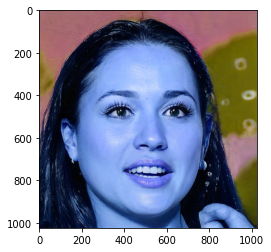

In [ ]:
# Just show one image of a real face - the 100-th one in the folder
image_array = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[100]))
plt.imshow(image_array)
plt.show()

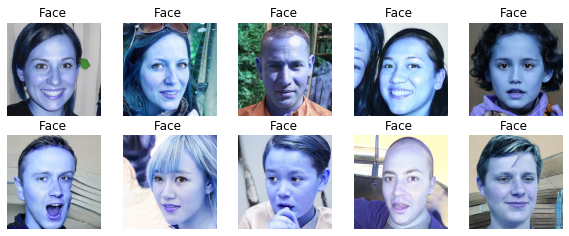

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(0,10):
    ax = plt.subplot(5, 5, i + 1)
    image_array = cv2.imread(os.path.join(path_faces, os.listdir(path_faces)[i]))
    plt.imshow(image_array)
    plt.title("Face ")
    plt.axis("off")

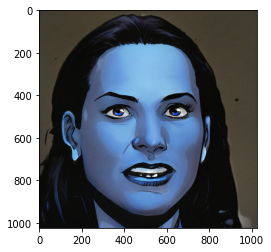

In [ ]:
# Just show one image of a real face - the 100-th one in the folder
image_array = cv2.imread(os.path.join(path_comics, os.listdir(path_faces)[100]))
plt.imshow(image_array)
plt.show()

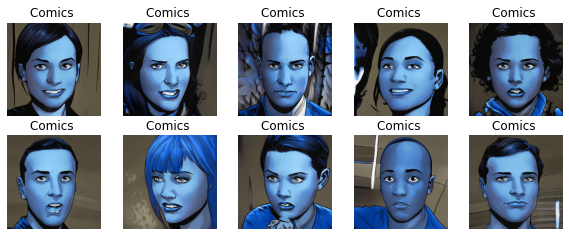

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(0,10):
    ax = plt.subplot(5, 5, i + 1)
    image_array = cv2.imread(os.path.join(path_comics, os.listdir(path_faces)[i]))
    plt.imshow(image_array)
    plt.title("Comics ")
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


**Data Augmentation**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


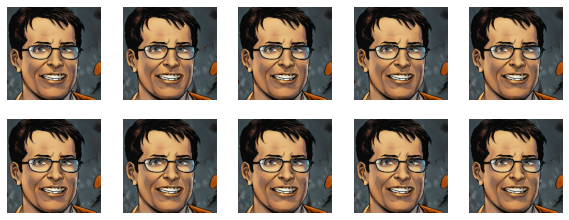

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(0,10):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Build model**

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

**Train the model**

In [ ]:
epochs=10
history = model.fit( train_ds,validation_data=val_ds, epochs=epochs)

Epoch 1/10
250/250 [==============================] - 614s 2s/step - loss: 0.0662 - accuracy: 0.9766 - val_loss: 0.0090 - val_accuracy: 0.9980
Epoch 2/10
250/250 [==============================] - 596s 2s/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0118 - val_accuracy: 0.9965
Epoch 3/10
250/250 [==============================] - 617s 2s/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.4397 - val_accuracy: 0.9227
Epoch 4/10
250/250 [==============================] - 597s 2s/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0064 - val_accuracy: 0.9980
Epoch 5/10
250/250 [==============================] - 604s 2s/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0173 - val_accuracy: 0.9958
Epoch 6/10
250/250 [==============================] - 610s 2s/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 7/10
250/250 [==============================] - 589s 2s/step - loss: 5.1276e-04 - accuracy: 0.9999 - val_loss: 0.0320 - val_accuracy: 0.

**Visualize training results**

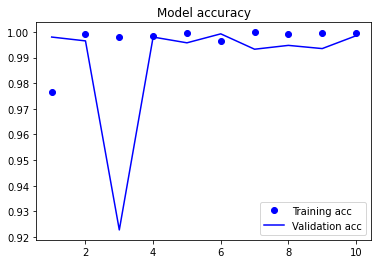

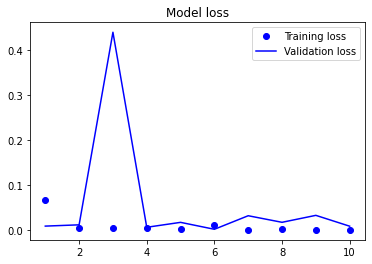

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model loss')
plt.legend()

plt.show()

**Predict on new data**

188416/179976 [===============================] - 0s 1us/step


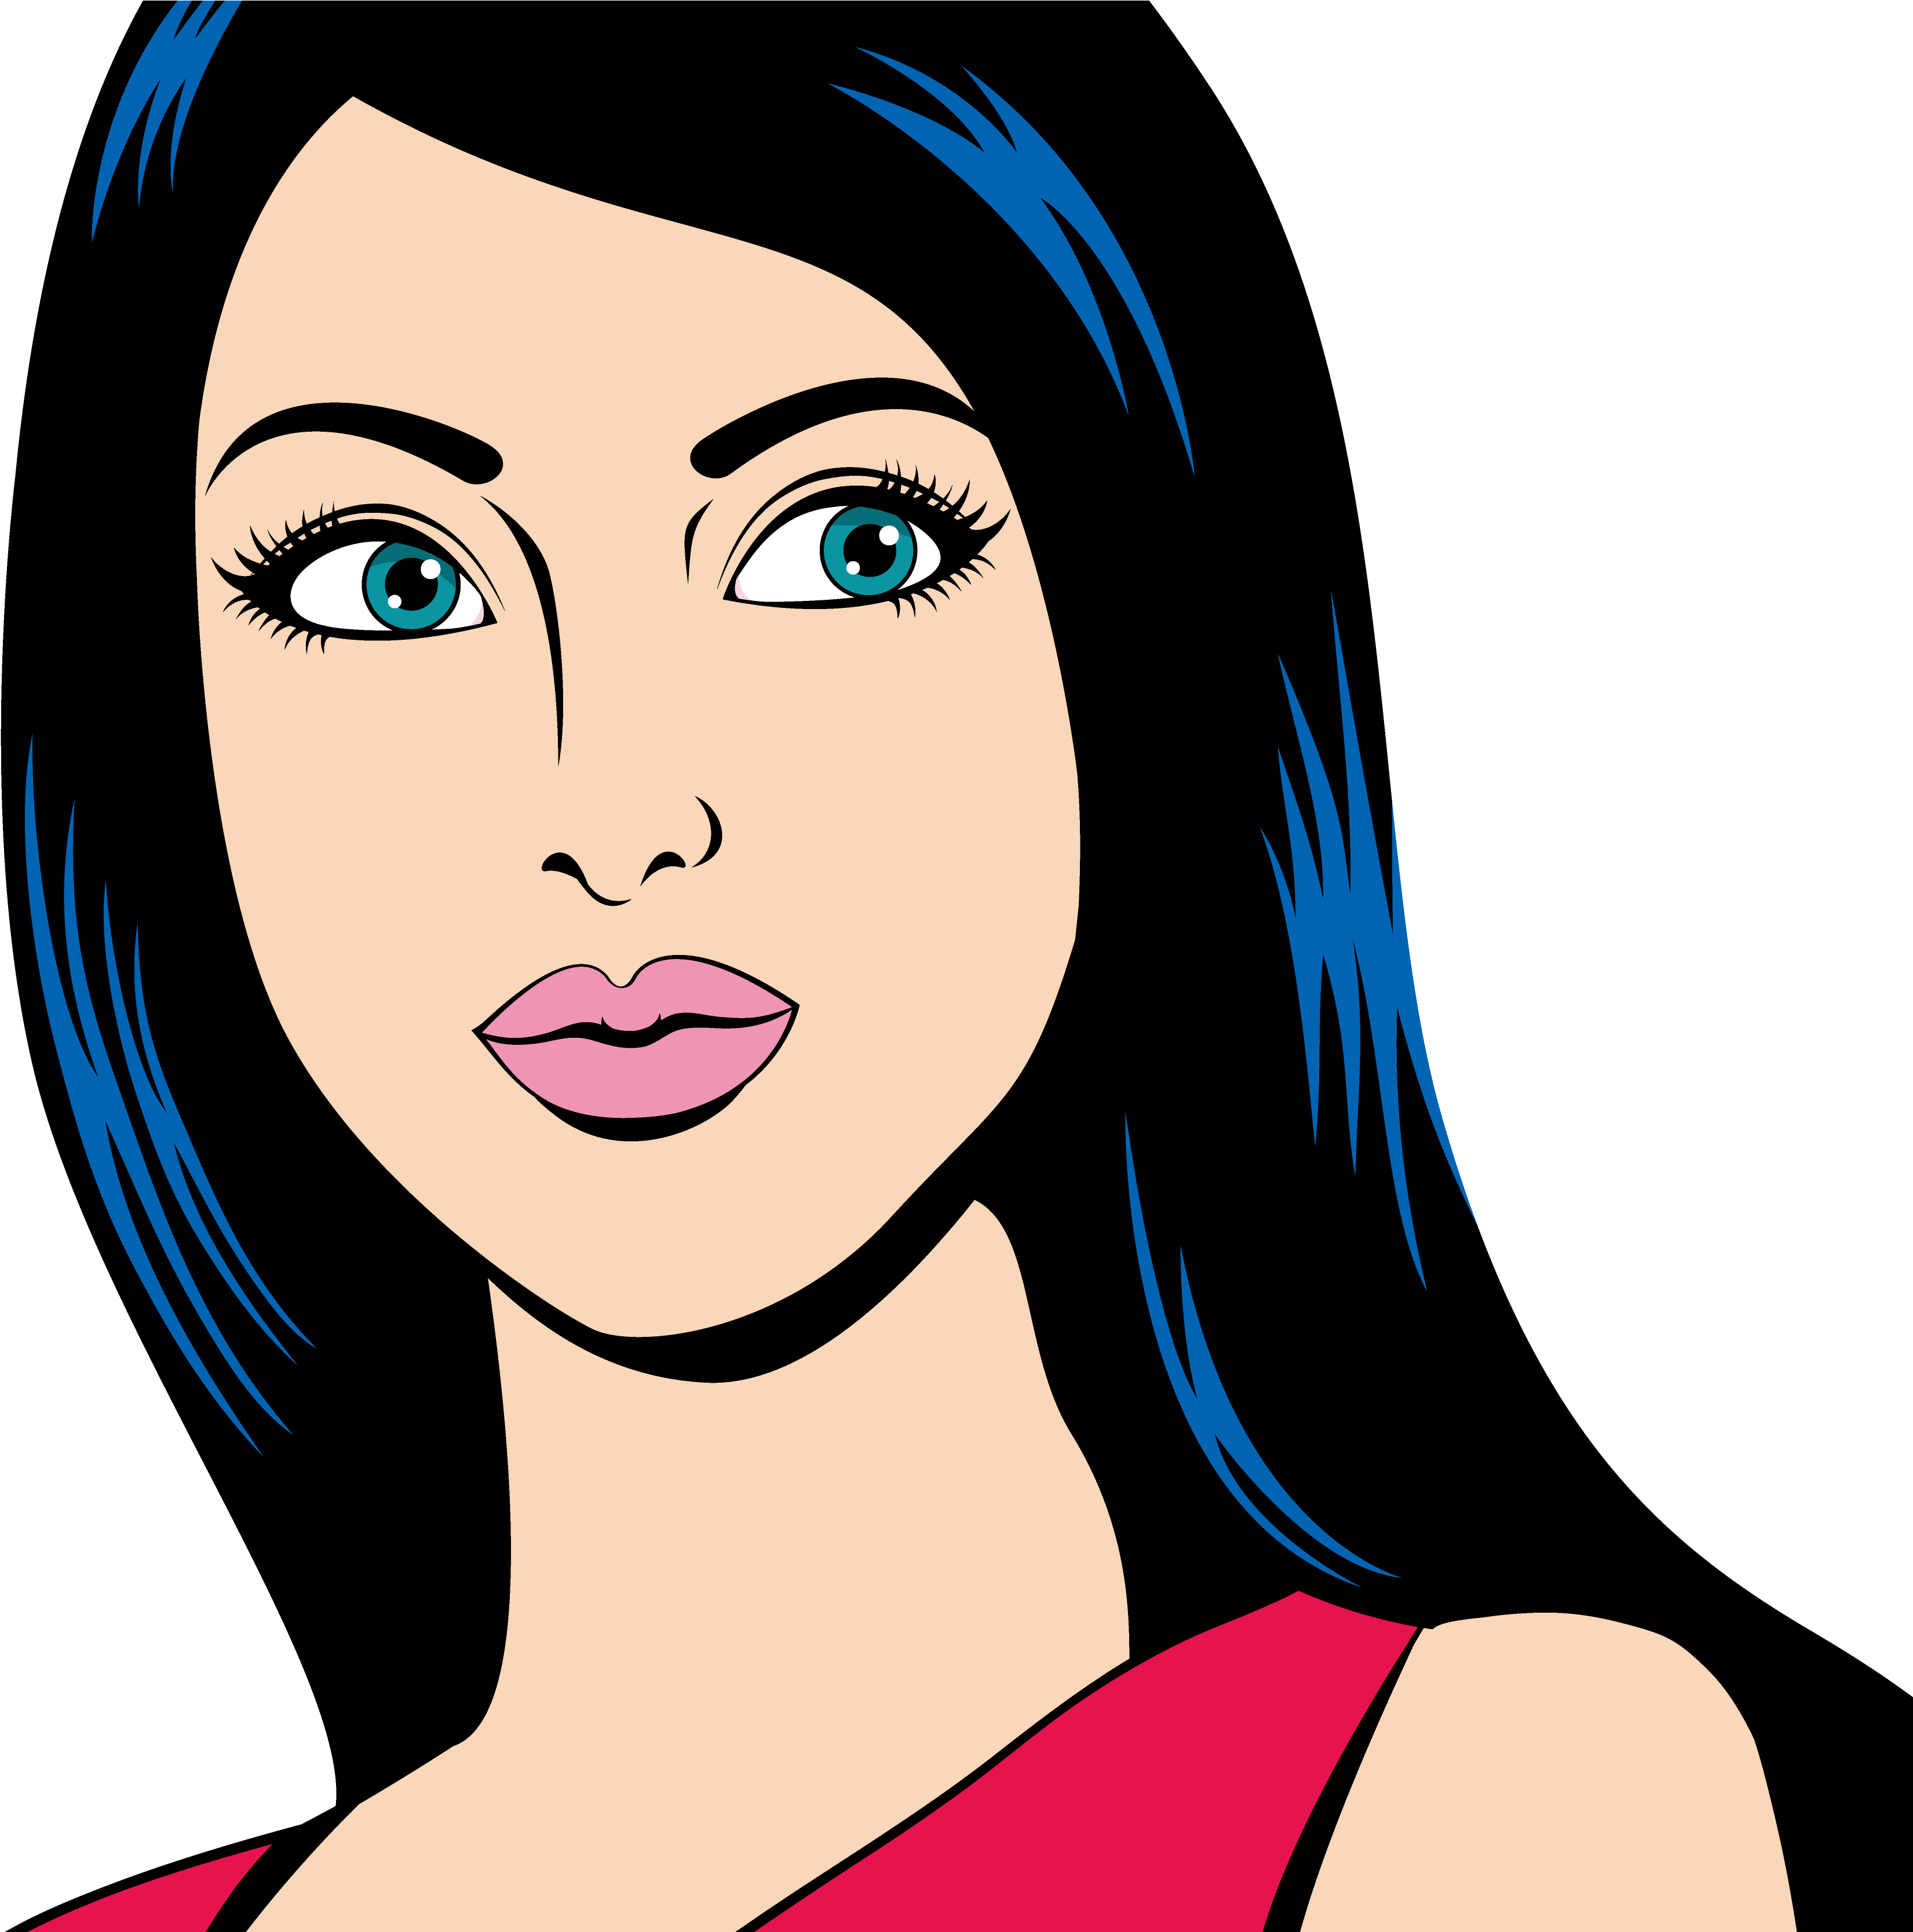

In [ ]:
comic_url = "https://www.seekpng.com/png/full/156-1565591_pop-art-comics-female-comic-book-female-comic.png"
comic_path = tf.keras.utils.get_file('156-1565591_pop-art-comics-female-comic-book-female-comic', origin=comic_url)

import IPython
IPython.display.Image(comic_url, width = 250)

In [ ]:
img = tf.keras.utils.load_img(
    comic_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to comics with a 100.00 percent confidence.


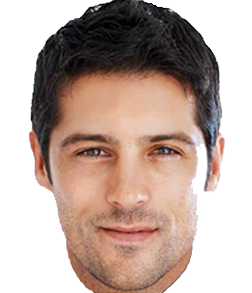

In [ ]:
face_url = "http://pngimg.com/uploads/face/face_PNG11761.png"
face_path = tf.keras.utils.get_file('12', origin=face_url)

import IPython
IPython.display.Image(face_url, width = 250)

In [ ]:
img1 = tf.keras.utils.load_img(
    face_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img1)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to comics with a 63.07 percent confidence.
